## Количество клиентов

In [1]:
import pandas as pd

# Пример загрузки данных
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Подсчет количества клиентов
client_count = len(df)
print(f'Количество клиентов: {client_count}')

Количество клиентов: 8715


## Средняя прибыль с клиента

In [5]:
average_profit = df['Profit'].mean()
print(f'Средняя прибыль с клиента: {average_profit:.2f} рублей')

Средняя прибыль с клиента: 15407.25 рублей


## Сравнение средней прибыли от мужчин до 24 и женщин до 24

In [10]:
# Твоё решение тут
import pandas as pd

df_non_sorted = pd.read_csv("https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv")
df_non_sorted.loc['Gender'] = df_non_sorted['Gender'].str.lower()
df_non_sorted = df_non_sorted.sort_values(by='Profit')

# df = df_non_sorted[(df_non_sorted['Age'] > 0)]
# (df_non_sorted['Profit'] >= 0) &

segment1 = df[(df['Gender'] == 'female') & (df['Age'] <= 24)]
segment2 = df[(df['Gender'] == 'male') & (df['Age'] <= 24)]

mean_female = segment1['Profit'].agg(['mean'])['mean']
mean_male = segment2['Profit'].agg(['mean'])['mean']

results = pd.DataFrame({'var': ['Женщины до 24', 'Мужчины до 24'],
                        'value': [mean_female, mean_male]})
results.head().style.format(precision=0)

,var,value
0,Женщины до 24,26278
1,Мужчины до 24,13156


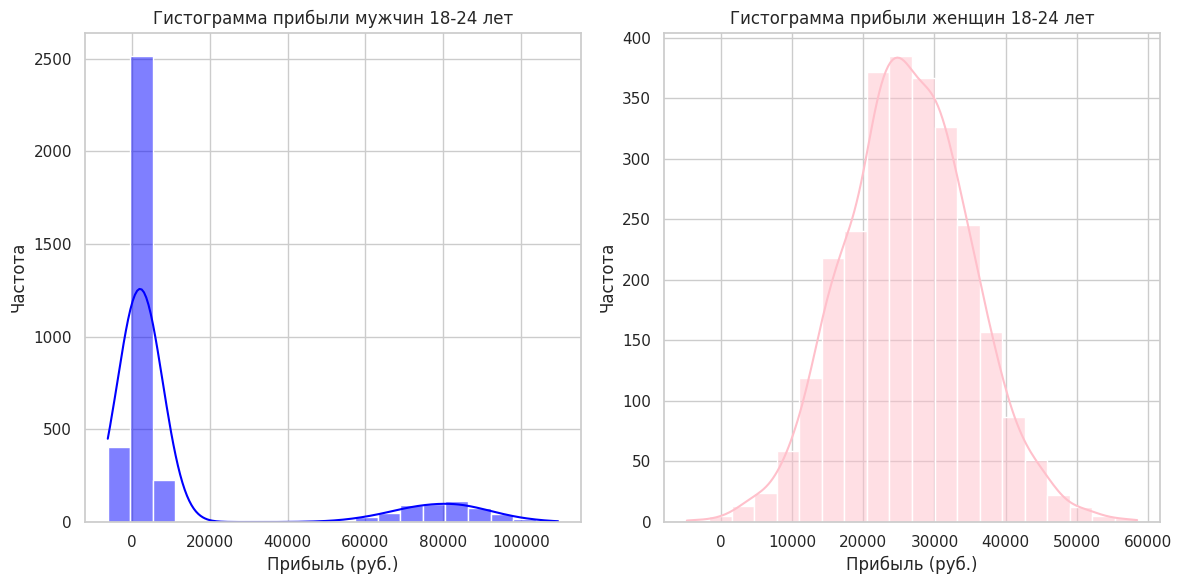

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Фильтрация данных
male_18_24 = data[(data['Gender'] == 'male') & (data['AgeGroup'] == '18-24')]
female_18_24 = data[(data['Gender'] == 'female') & (data['AgeGroup'] == '18-24')]
data['Gender'] = data['Gender'].map(lambda x: x.lower())

# Проверка наличия данных в подвыборках
if male_18_24.empty:
    print("Нет данных для мужчин 18-24 лет.")
if female_18_24.empty:
    print("Нет данных для женщин 18-24 лет.")

# Настройка стиля графиков
sns.set(style="whitegrid")

# Построение гистограммы для мужчин 18-24 лет
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if not male_18_24.empty:
    sns.histplot(male_18_24['Profit'], bins=20, color='blue', kde=True)
    plt.title('Гистограмма прибыли мужчин 18-24 лет')
    plt.xlabel('Прибыль (руб.)')
    plt.ylabel('Частота')
else:
    plt.title('Нет данных для мужчин 18-24 лет')
    plt.xlabel('Прибыль (руб.)')
    plt.ylabel('Частота')

# Построение гистограммы для женщин 18-24 лет
plt.subplot(1, 2, 2)
if not female_18_24.empty:
    sns.histplot(female_18_24['Profit'], bins=20, color='pink', kde=True)
    plt.title('Гистограмма прибыли женщин 18-24 лет')
    plt.xlabel('Прибыль (руб.)')
    plt.ylabel('Частота')
else:
    plt.title('Нет данных для женщин 18-24 лет')
    plt.xlabel('Прибыль (руб.)')
    plt.ylabel('Частота')

# Показать графики
plt.tight_layout()
plt.show()

Прибыль от категории Женщины до 24 лет почти в 2 раза больше чем от категории Мужчины до 24 лет

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


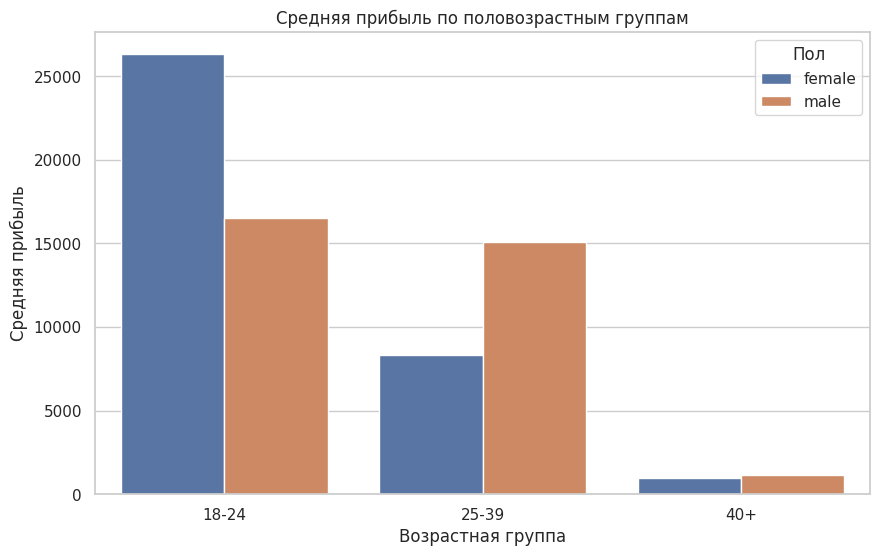

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Очистка данных
df = df.drop_duplicates()  # Удаление дубликатов
df['Gender'] = df['Gender'].str.lower()  # Приведение значений гендера к нижнему регистру
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')  # Приведение типов
df['Costs'] = pd.to_numeric(df['Costs'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Фильтрация отрицательных значений
df = df[(df['Payments'] >= 0) & (df['Costs'] >= 0) & (df['Profit'] >= 0)]

# Удаление строк с недопустимыми значениями
df = df.dropna()

# Группировка по половой и возрастной группе и расчет средней прибыли
average_profit = df.groupby(['Gender', 'AgeGroup'])['Profit'].mean().reset_index()

# Настройка графика
plt.figure(figsize=(10, 6))
sns.barplot(data=average_profit, x='AgeGroup', y='Profit', hue='Gender')

# Настройка заголовков и меток
plt.title('Средняя прибыль по половозрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя прибыль')
plt.legend(title='Пол')

# Показать график
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


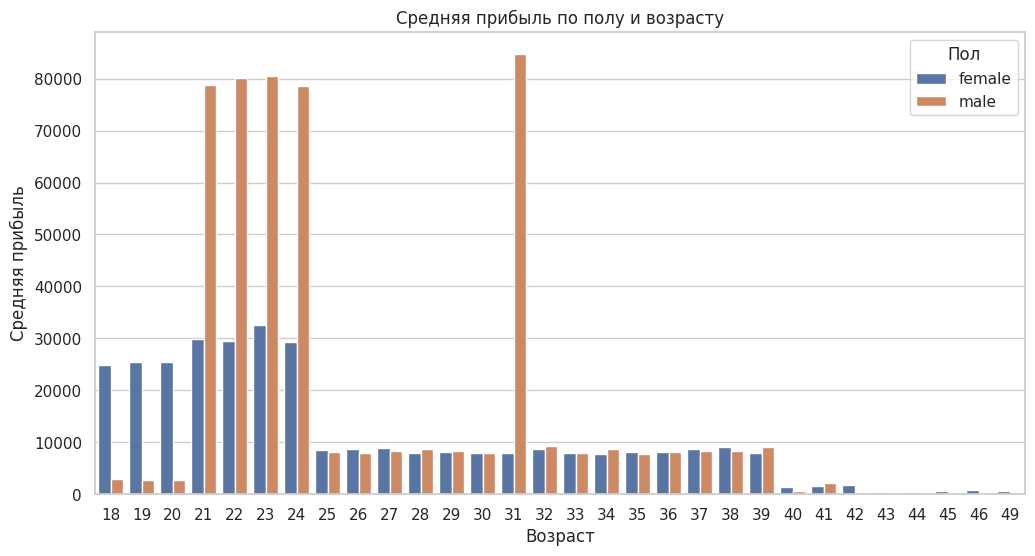

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Очистка данных
df = df.drop_duplicates()  # Удаление дубликатов
df['Gender'] = df['Gender'].str.lower()  # Приведение значений гендера к нижнему регистру
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')  # Приведение типов
df['Costs'] = pd.to_numeric(df['Costs'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Фильтрация отрицательных значений
df = df[(df['Payments'] >= 0) & (df['Costs'] >= 0) & (df['Profit'] >= 0)]

# Удаление строк с недопустимыми значениями
df = df.dropna()

# Группировка по полу и возрасту, расчет средней прибыли
average_profit = df.groupby(['Gender', 'Age'])['Profit'].mean().reset_index()

# Настройка графика
plt.figure(figsize=(12, 6))
sns.barplot(data=average_profit, x='Age', y='Profit', hue='Gender')

# Настройка заголовков и меток
plt.title('Средняя прибыль по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средняя прибыль')
plt.legend(title='Пол')

# Показать график
plt.show()

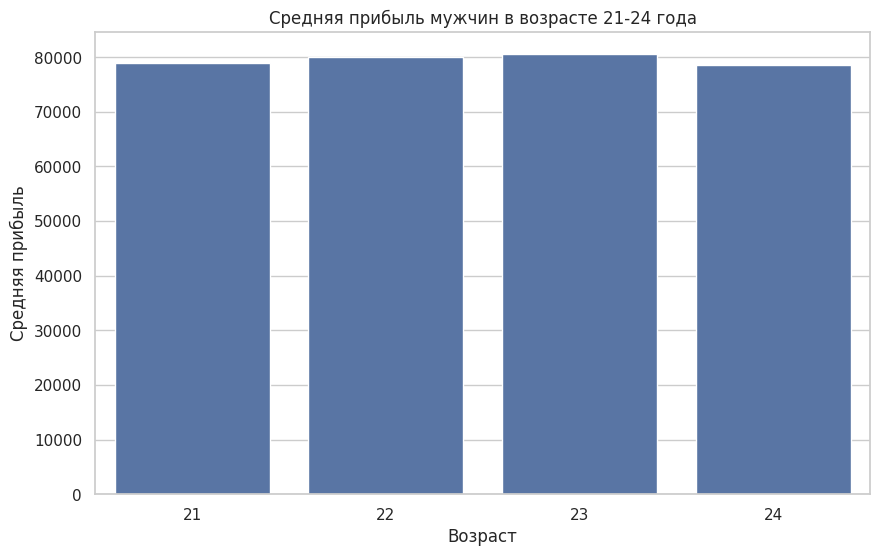

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Очистка данных
df = df.drop_duplicates()  # Удаление дубликатов
df['Gender'] = df['Gender'].str.lower()  # Приведение значений гендера к нижнему регистру
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')  # Приведение типов
df['Costs'] = pd.to_numeric(df['Costs'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Фильтрация отрицательных значений
df = df[(df['Payments'] >= 0) & (df['Costs'] >= 0) & (df['Profit'] >= 0)]

# Удаление строк с недопустимыми значениями
df = df.dropna()

# Фильтрация по возрасту от 21 до 24 и по гендеру "male"
df_filtered = df[(df['Age'] >= 21) & (df['Age'] <= 24) & (df['Gender'] == 'male')]

# Группировка по возрасту и расчет средней прибыли
average_profit = df_filtered.groupby('Age')['Profit'].mean().reset_index()

# Настройка графика
plt.figure(figsize=(10, 6))
sns.barplot(data=average_profit, x='Age', y='Profit')

# Настройка заголовков и меток
plt.title('Средняя прибыль мужчин в возрасте 21-24 года')
plt.xlabel('Возраст')
plt.ylabel('Средняя прибыль')

# Показать график
plt.show()

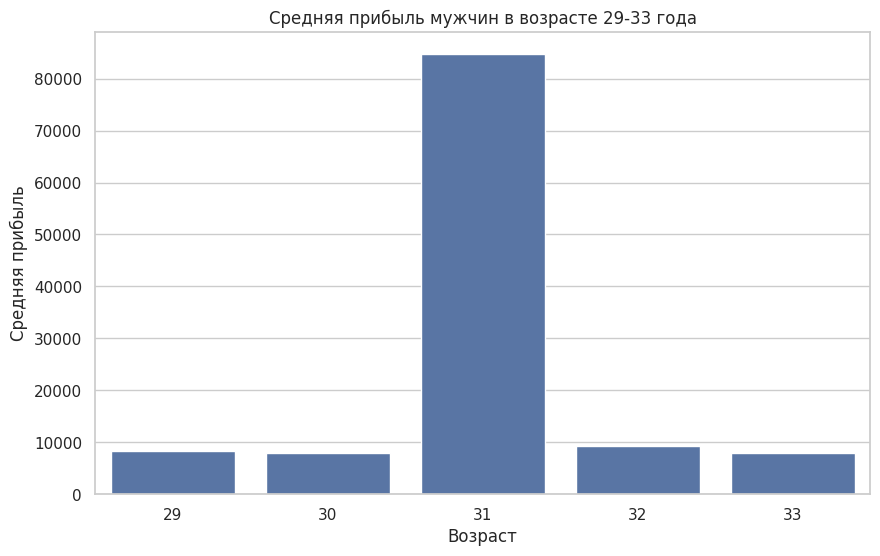

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

# Очистка данных
df = df.drop_duplicates()  # Удаление дубликатов
df['Gender'] = df['Gender'].str.lower()  # Приведение значений гендера к нижнему регистру
df['Payments'] = pd.to_numeric(df['Payments'], errors='coerce')  # Приведение типов
df['Costs'] = pd.to_numeric(df['Costs'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Фильтрация отрицательных значений
df = df[(df['Payments'] >= 0) & (df['Costs'] >= 0) & (df['Profit'] >= 0)]

# Удаление строк с недопустимыми значениями
df = df.dropna()

# Фильтрация по возрасту от 29 до 33 и по гендеру "male"
df_filtered = df[(df['Age'] >= 29) & (df['Age'] <= 33) & (df['Gender'] == 'male')]

# Группировка по возрасту и расчет средней прибыли
average_profit = df_filtered.groupby('Age')['Profit'].mean().reset_index()

# Настройка графика
plt.figure(figsize=(10, 6))
sns.barplot(data=average_profit, x='Age', y='Profit')

# Настройка заголовков и меток
plt.title('Средняя прибыль мужчин в возрасте 29-33 года')
plt.xlabel('Возраст')
plt.ylabel('Средняя прибыль')

# Показать график
plt.show()

## Абсолютная частота клиентов, прибыль платформы с которых 60 тысяч рублей или больше

In [ ]:
# Твоё решение тут
segment1_60 = segment1[segment1['Profit'] >= 60_000]
segment2_60 = segment2[segment2['Profit'] >= 60_000]

results = pd.DataFrame({'var': ['Женщины до 24', 'Мужчины до 24'],
                        'value': [len(segment1_60),
                                  len(segment2_60)]})
results

,var,value
0,Женщины до 24,0
1,Мужчины до 24,506


## Средняя прибыль и частота прибыли 60 тысяч рублей и больше для каждой категории пола и возрастной группы

In [ ]:
# Твоё решение тут

def filter(x):
  return len([item for item in x if item >= 60_000])

categories = set(df['AgeGroup'])
genders = ['male', 'female', 'helicopter']
answers = {x: dict() for x in genders}
data = df.groupby(['Gender', 'AgeGroup']).agg({'Profit': ['mean', filter]})
data.columns = ['Mean', 'Frequency']
data
# data.agg({'Profit': filter})
# data

Mean  Frequency
Gender AgeGroup                         
female 18-24     26320.439439          0
       25-39      8317.340792          0
       40+         994.444444          0
male   18-24     15763.146067        506
       25-39     15085.219164          1
       40+        1125.000000          0